

#  Exploratory Data Analysis 



# Dataset Setup & Preprocessing
-  Import and inspect dataset
    - Load the CSV
    - Check structure with df.info() and df.describe()
    - Print a sample with df.head()

- lean price column
    - Use a function to remove strings, currency symbols, and convert to float
    - Ensure numeric types and handle NaN

- Filter out unrealistic or missing prices
    - Filter where price <= 5,000,000 and price > 1

- Handle town names
    - Normalize casing
    - (Possibly merge spelling variations (e.g. "Brussels" vs "Bruxelles"))

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def clean_price_column(df: pd.DataFrame, col: str = "price") -> pd.Series:
    """
    Clean and convert a price column to float.
    
    Handles:
    - Non-breaking spaces (U+202F)
    - Euro symbols (€)
    - Thousand separators
    - Invalid or missing entries

    Parameters:
        df (pd.DataFrame): Your dataframe.
        col (str): Column name to clean.

    Returns:
        pd.Series: Cleaned float Series with valid prices.
    """
    cleaned = (
        df[col]
        .astype(str)
        .str.replace("\u202f", "", regex=False)  # non-breaking space
        .str.replace(" ", "", regex=False)       # standard space
        .str.replace("€", "", regex=False)
        .str.extract(r"([\d\.]+)")               # extract numeric part
        .squeeze()
        .astype(float)
    )
    return cleaned

# Dataset Setup & Proprocessing
- Import and inspect dataset

- Load the CSV
    - Check structure with df.info() and df.describe()
    - Print a sample with df.head()

- Clean price column
    - Use a function to remove strings, currency symbols, and convert to float
    - Ensure numeric types and handle NaN

- Filter out unrealistic or missing prices
    - Filter where price <= 5,000,000 and price > 1

- Handle town names
    - Normalize casing
    - Possibly merge spelling variations (e.g. "Brussels" vs "Bruxelles")

## Import and inspect dataset


In [3]:
csv_path = "../output_scraped/_real_estate_details_20250617_2315/_real_estate_details_20250617_2315.csv"
df = pd.read_csv(csv_path)
df.head()


,town,page,url,property_type,price,address,postal_code,city,bedrooms,bedroom1_surface,...,year_built,condition,kitchen_equipment,cellar,glazing_type,elevator,entry_phone,epc_score,epc_total,epc_valid_until
0,aalst,1,https://immovlan.be/en/detail/apartment/for-sa...,Apartment,169 000 €,Geldhofstraat 2 2 9300 Aalst,2.0,Aalst,1.0,NaN,...,1913.0,Normal,Super equipped,NaN,Double glass,No,Yes,151 kWh/m²/year,NaN,NaN
1,aalst,1,https://immovlan.be/en/detail/apartment/for-sa...,Apartment,339 000 €,Bauwensplein 3 A0.1 9300 Aalst,3.0,Aalst,2.0,NaN,...,NaN,New,Super equipped,No,NaN,No,NaN,NaN,NaN,NaN
2,aalst,1,https://immovlan.be/en/detail/apartment/for-sa...,Apartment,290 000 €,Arendsveld 2 9300 Aalst,2.0,Aalst,4.0,NaN,...,1930.0,To be renovated,NaN,No,NaN,No,NaN,805 kWh/m²/year,NaN,NaN
3,aalst,1,https://immovlan.be/en/detail/apartment/for-sa...,Apartment,265 000 €,Ouden Dendermondse Steenweg 144 21 9300 Aalst,144.0,Aalst,3.0,12 m²,...,2019.0,Excellent,Super equipped,Yes,Double glass,Yes,Yes,NaN,NaN,05/05/2029
4,aalst,1,https://immovlan.be/en/detail/apartment/for-sa...,Apartment,195 000 €,Raffelgemstraat 16 5 9300 Aalst,16.0,Aalst,2.0,NaN,...,1967.0,Normal,NaN,No,NaN,Yes,NaN,149 kWh/m²/year,NaN,NaN


## Check structure with `df.info()` and `df.describe()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17300 entries, 0 to 17299
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   town                 17300 non-null  object 
 1   page                 17300 non-null  int64  
 2   url                  17300 non-null  object 
 3   property_type        17216 non-null  object 
 4   price                17212 non-null  object 
 5   address              17216 non-null  object 
 6   postal_code          17216 non-null  float64
 7   city                 17216 non-null  object 
 8   bedrooms             16833 non-null  float64
 9   bedroom1_surface     5511 non-null   object 
 10  bedroom2_surface     5009 non-null   object 
 11  bathrooms            15120 non-null  float64
 12  toilets              11428 non-null  float64
 13  surface_livable      15745 non-null  object 
 14  terrace              12602 non-null  object 
 15  terrace_surface      6368 non-null  

In [5]:
df.describe()

,page,postal_code,bedrooms,bathrooms,toilets,floor,year_built
count,17300.000000,1.721600e+04,16833.000000,15120.000000,11428.000000,5749.000000,9812.000000
mean,9.417052,1.397921e+05,2.896275,1.376257,1.654708,2.398852,1975.658072
std,10.825978,8.114412e+06,1.961986,9.374295,0.979776,3.553851,54.214728
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,209.000000
25%,2.000000,1.700000e+01,2.000000,1.000000,1.000000,1.000000,1952.000000
50%,5.000000,5.800000e+01,3.000000,1.000000,1.000000,2.000000,1979.000000
75%,12.000000,8.960000e+02,3.000000,1.000000,2.000000,3.000000,2019.000000
max,59.000000,4.841040e+08,100.000000,1146.000000,17.000000,180.000000,2028.000000


In [6]:
print(df.dtypes)

town                    object
page                     int64
url                     object
property_type           object
price                   object
address                 object
postal_code            float64
city                    object
bedrooms               float64
bedroom1_surface        object
bedroom2_surface        object
bathrooms              float64
toilets                float64
surface_livable         object
terrace                 object
terrace_surface         object
terrace_orientation     object
floor                  float64
year_built             float64
condition               object
kitchen_equipment       object
cellar                  object
glazing_type            object
elevator                object
entry_phone             object
epc_score               object
epc_total               object
epc_valid_until         object
dtype: object


In [7]:
df.value_counts("property_type")

property_type
Residence    8618
Apartment    5828
Villa         617
Mixed         500
Duplex        341
Ground        325
Studio        288
Penthouse     229
Master        174
Bungalow       84
Cottage        63
Loft           55
Chalet         37
Triplex        32
Mansion        25
Name: count, dtype: int64

## Clean the `price`column

In [8]:

print(df["price"])


0               169 000 €
1               339 000 €
2               290 000 €
3               265 000 €
4               195 000 €
               ...       
17295           395 000 €
17296           440 000 €
17297           455 000 €
17298           455 000 €
17299    Price on request
Name: price, Length: 17300, dtype: object


### Function to clean prices
- Remove strings, currency symbols, and convert to float
- Ensure numeric types and handle NaN

In [9]:
def clean_price_column(df: pd.DataFrame, col: str = "price") -> pd.Series:
    """
    Clean and convert a price column to float.
    
    Handles:
    - Non-breaking spaces (U+202F)
    - Euro symbols (€)
    - Thousand separators
    - Invalid or missing entries

    Parameters:
        df (pd.DataFrame): Your dataframe.
        col (str): Column name to clean.

    Returns:
        pd.Series: Cleaned float Series with valid prices.
    """
    cleaned = (
        df[col]
        .astype(str)
        .str.replace("\u202f", "", regex=False)  # non-breaking space
        .str.replace(" ", "", regex=False)       # standard space
        .str.replace("€", "", regex=False)
        .str.extract(r"([\d\.]+)")               # extract numeric part
        .squeeze()
        .astype(float)
    )
    return cleaned

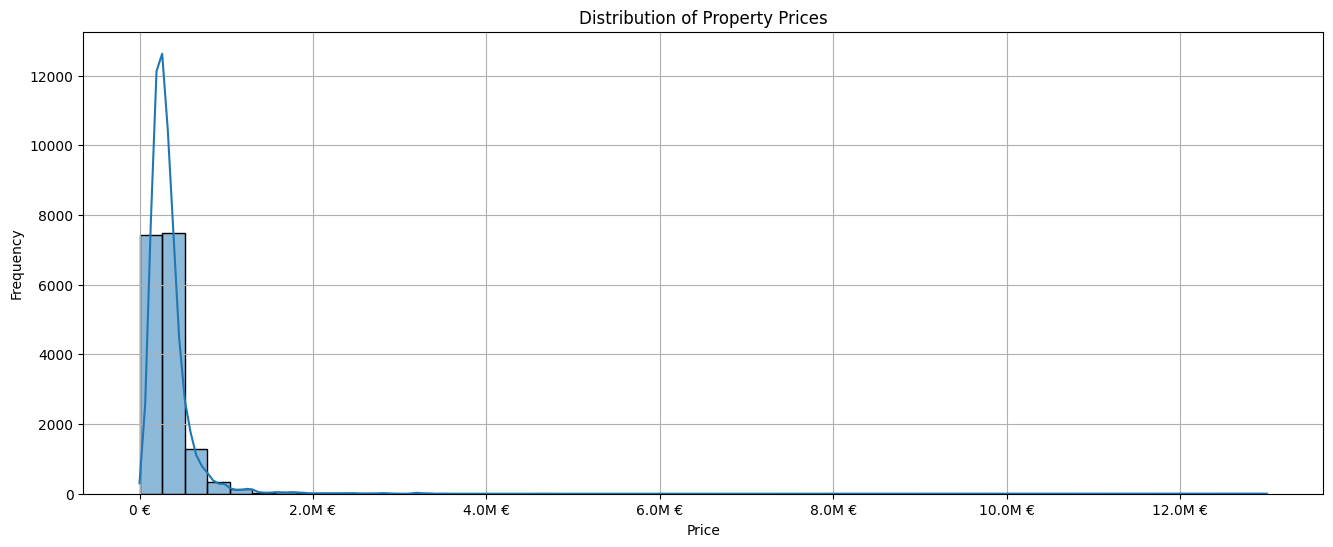

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Clean the price column and create df_clean if not already done
df_clean = df.copy()
df_clean["price"] = clean_price_column(df_clean, "price")

# Définir la taille du graphique (par exemple 16 pouces x 6 pouces)
plt.figure(figsize=(16, 6))

sns.histplot(data=df_clean, x="price", bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)

# Formatter intelligent
def format_price(x, _):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M €'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K €'
    else:
        return f'{int(x)} €'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_price))
plt.show()


## Filter out unrealistic or missing prices
- Filter where price <= 5,000,000 and price > 1

In [11]:
# Filter out unrealistic or missing prices
# Keep properties with price between 1 and 5,000,000 EUR

df_filtered = df_clean[
    (df_clean["price"].notna()) &
    (df_clean["price"] > 1) &
    (df_clean["price"] <= 5_000_000)
]

print(f"Filtered dataset shape: {df_filtered.shape}")
print(df_filtered["price"].describe())

Filtered dataset shape: (16800, 28)
count    1.680000e+04
mean     3.317392e+05
std      2.470128e+05
min      4.140000e+02
25%      1.990000e+05
50%      2.800000e+05
75%      3.900000e+05
max      5.000000e+06
Name: price, dtype: float64


In [12]:
# Display readable summary statistics
summary = df_filtered["price"].describe().apply(lambda x: f"{x:,.0f} €")

print(f" Filtered dataset shape: {df_filtered.shape[0]} properties, {df_filtered.shape[1]} columns")
print("\n Price Statistics (after filtering):")
print(summary)

 Filtered dataset shape: 16800 properties, 28 columns

 Price Statistics (after filtering):
count       16,800 €
mean       331,739 €
std        247,013 €
min            414 €
25%        199,000 €
50%        280,000 €
75%        390,000 €
max      5,000,000 €
Name: price, dtype: object


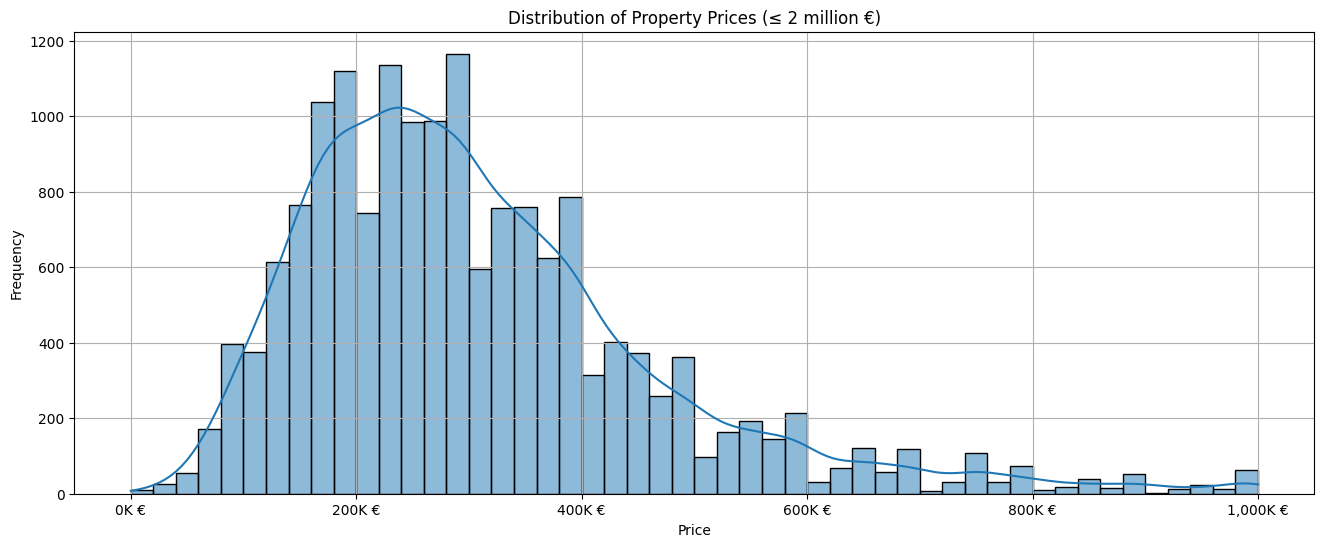

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrage : propriétés avec un prix ≤ 2 000 000 €
df_zoom = df_clean[df_clean["price"] <= 1_000_000]

# Taille du graphe
plt.figure(figsize=(16, 6))

# Affichage histogramme
sns.histplot(data=df_zoom, x="price", bins=50, kde=True)
plt.title("Distribution of Property Prices (≤ 2 million €)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)

# Format de l'axe X
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{int(x / 1_000):,}K €')
)

plt.show()


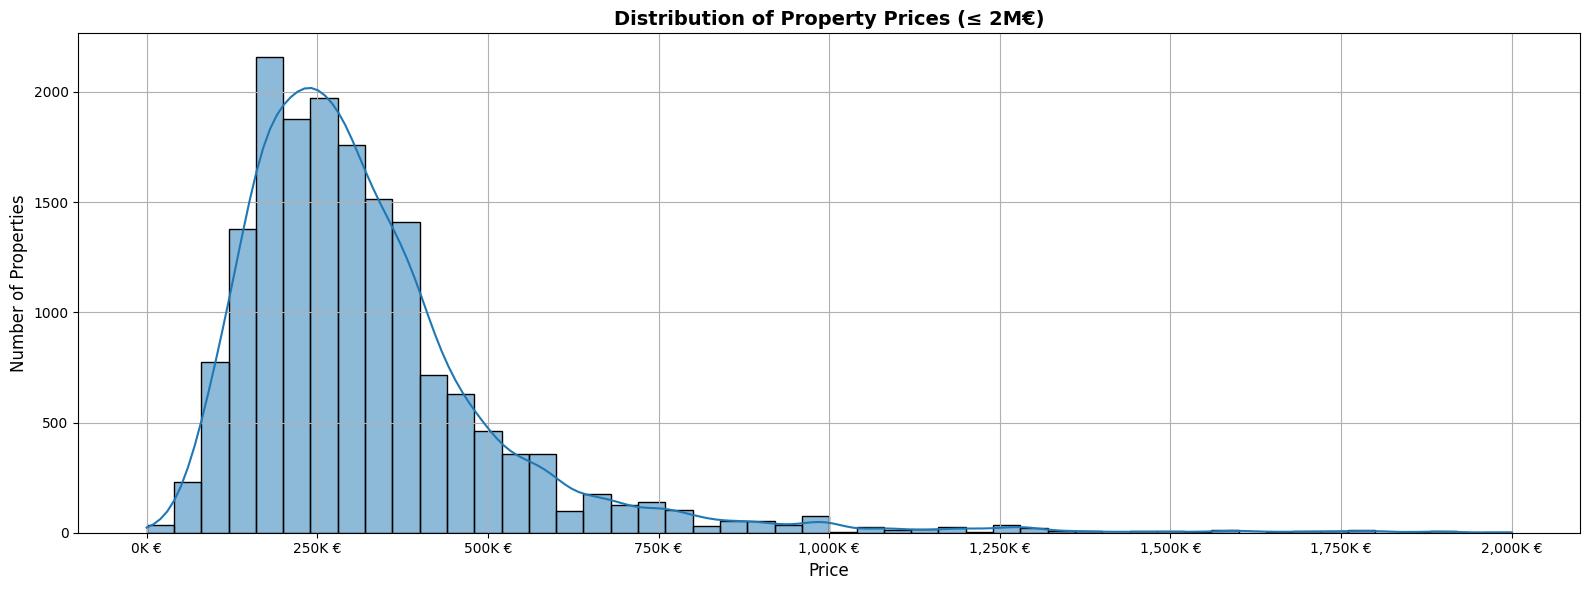

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter properties with price ≤ 2,000,000 €
df_zoom = df_clean[df_clean["price"] <= 2_000_000]

# Create the figure with a wider format for clarity
plt.figure(figsize=(16, 6))

# Plot histogram with KDE
sns.histplot(data=df_zoom, x="price", bins=50, kde=True)
plt.title("Distribution of Property Prices (≤ 2M€)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)
plt.grid(True)

# Format the x-axis to show prices in thousands with € symbol
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{int(x / 1_000):,}K €')
)

plt.tight_layout()
plt.show()


In [15]:
print(df["property_type"].value_counts())


property_type
Residence    8618
Apartment    5828
Villa         617
Mixed         500
Duplex        341
Ground        325
Studio        288
Penthouse     229
Master        174
Bungalow       84
Cottage        63
Loft           55
Chalet         37
Triplex        32
Mansion        25
Name: count, dtype: int64


## Distribution of property prices across the 10 most frequent town (<1M€)

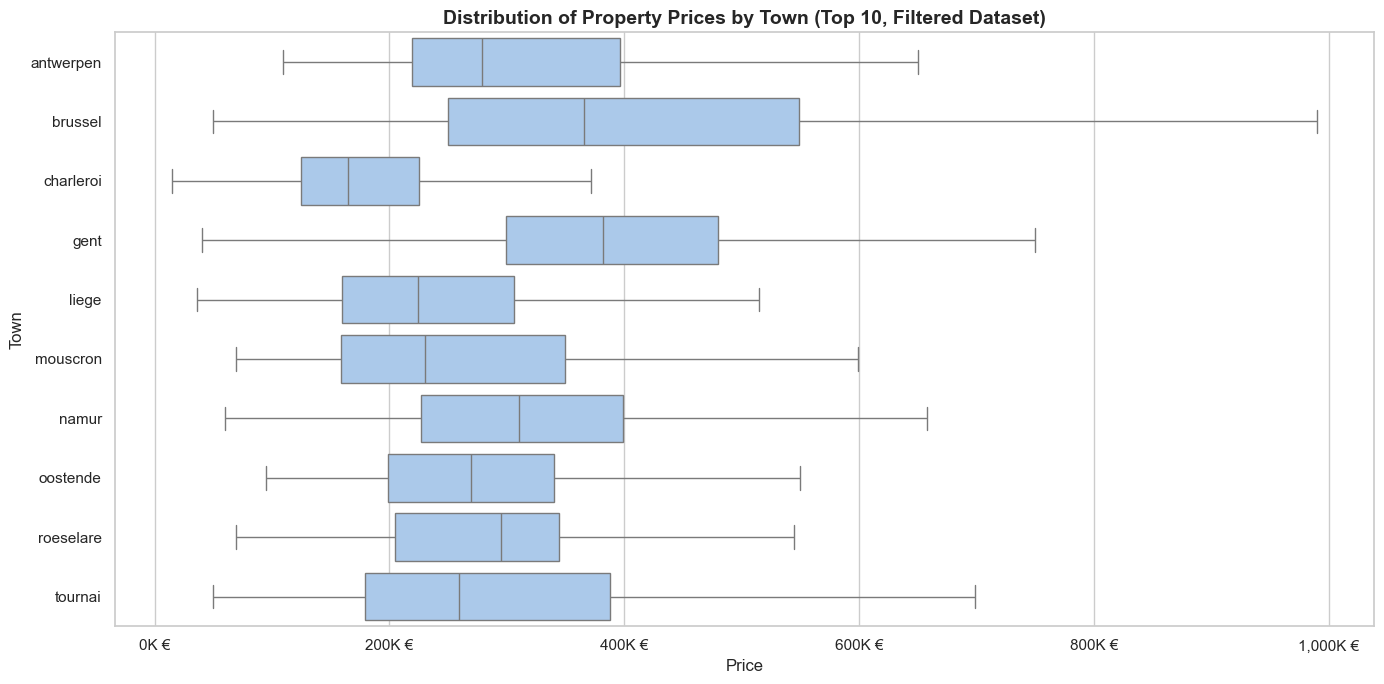

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Use the cleaned and filtered dataset
# Keep only the 10 most represented towns
top_towns = df_filtered["town"].value_counts().nlargest(10).index
df_top = df_filtered[df_filtered["town"].isin(top_towns)]

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", palette="pastel")

ax = sns.boxplot(data=df_top, y="town", x="price", orient="h", showfliers=False)

# Format x-axis in K €
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1000):,}K €"))

# Labels and title
plt.title("Distribution of Property Prices by Town (Top 10, Filtered Dataset)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.tight_layout()
plt.show()



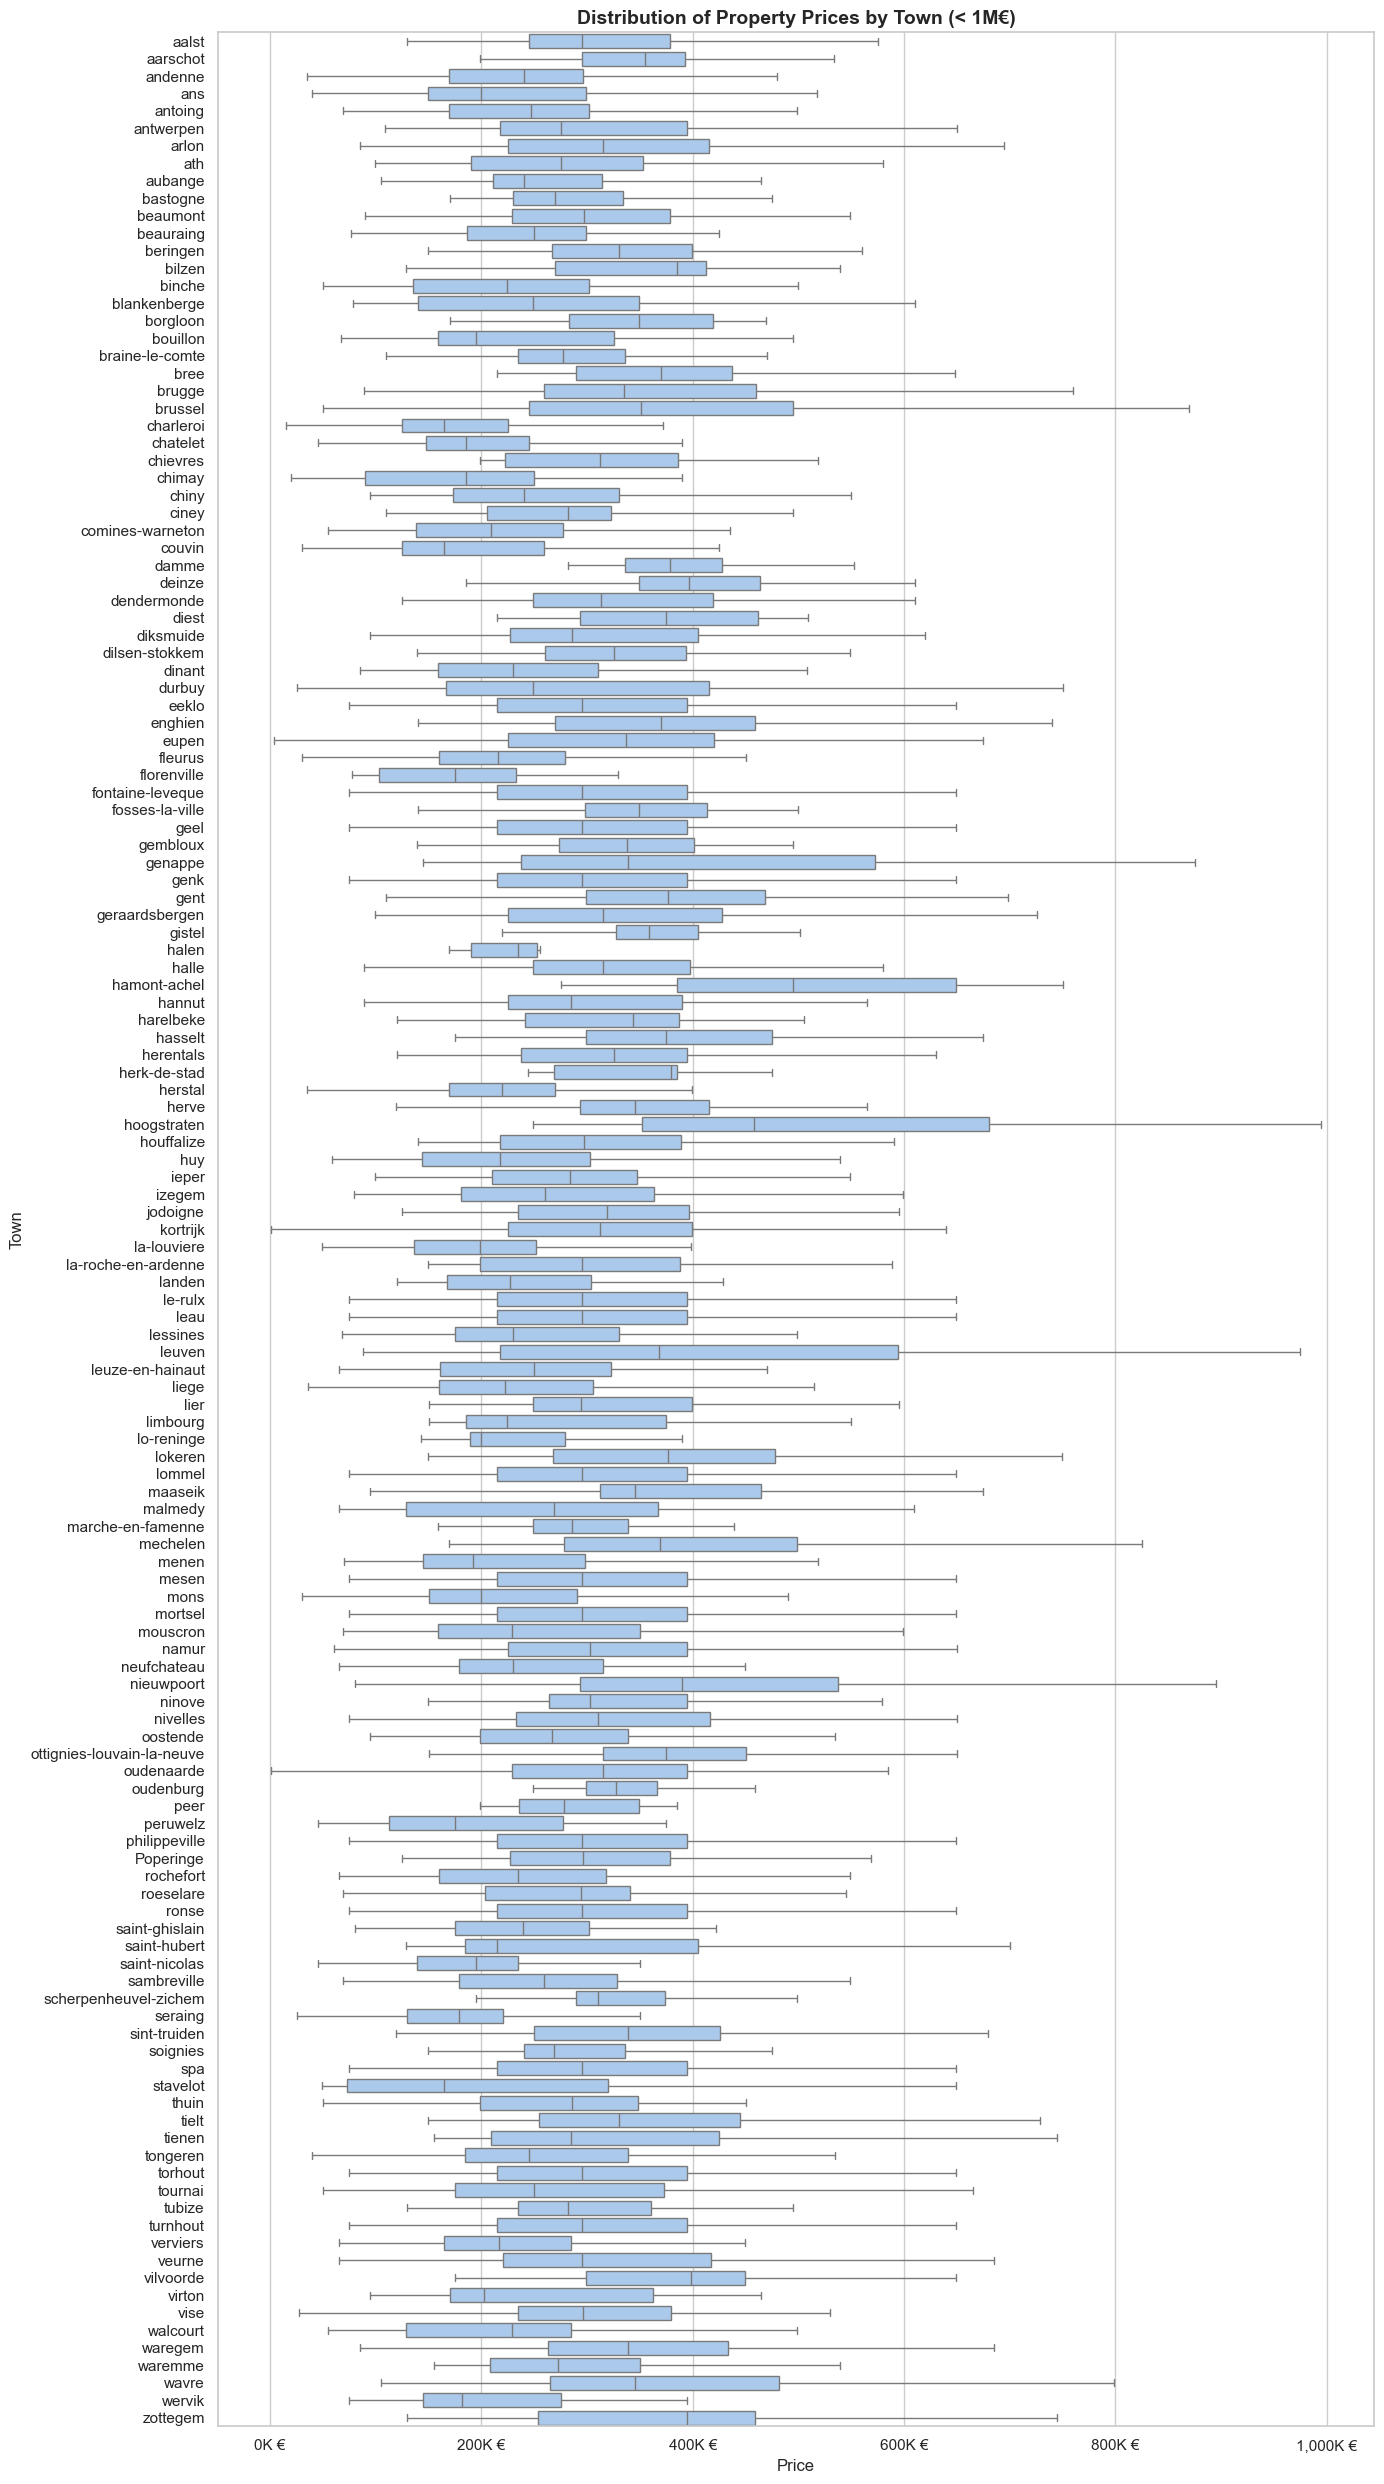

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter properties under 1 million euros
df_filtered = df_clean[df_clean["price"] <= 1_000_000]

# Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Plot
plt.figure(figsize=(14, 25))  # You can adjust height if too many towns
ax = sns.boxplot(data=df_filtered, y="town", x="price", orient="h", showfliers=False)

# Format
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000):,}K €"))
plt.title("Distribution of Property Prices by Town (< 1M€)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.tight_layout()
plt.show()


## Top 30 Most Expensive Towns by Median Price (≥ 50 listings, < 1M€)

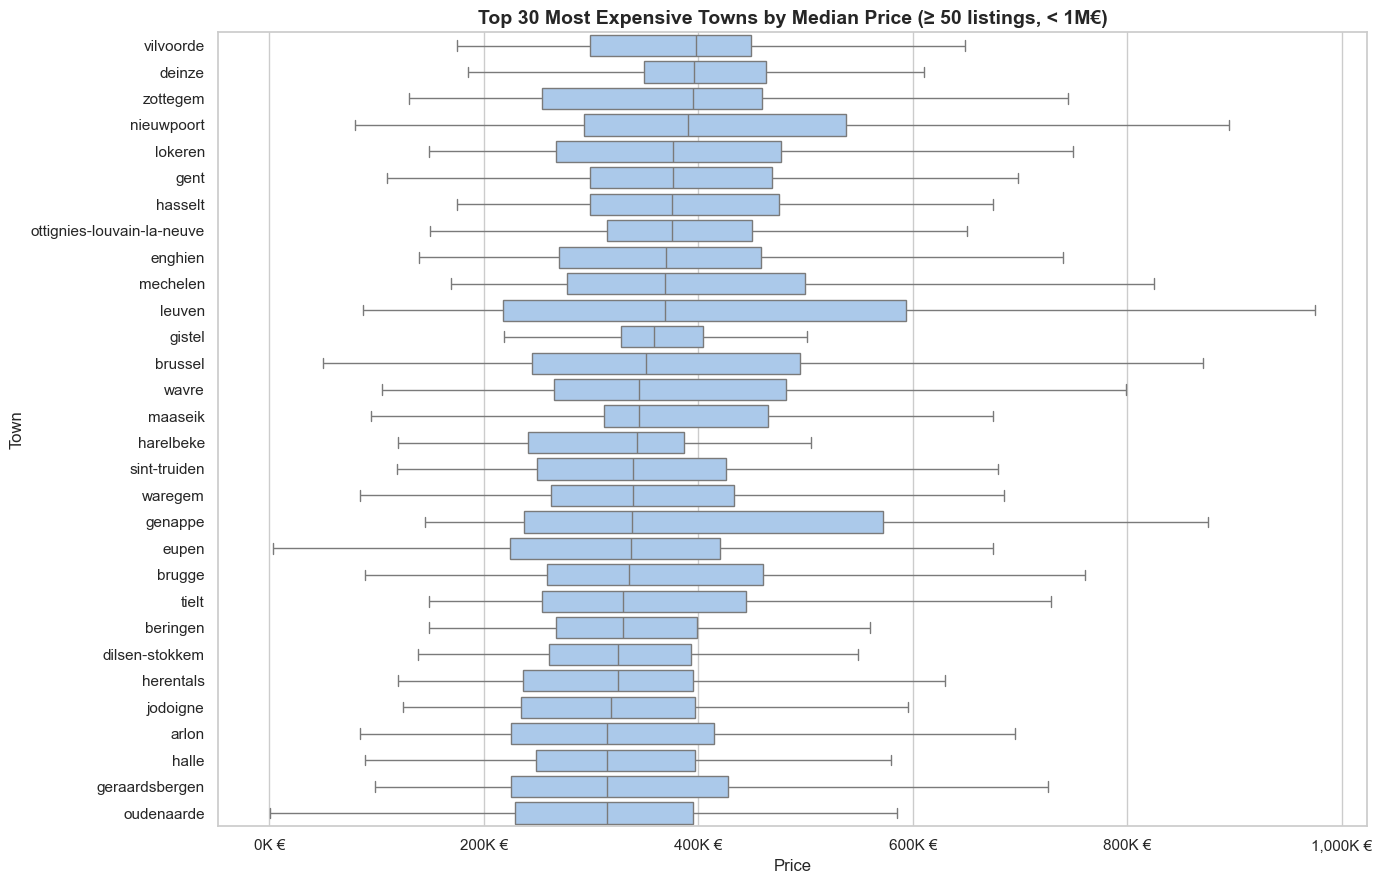

In [18]:
# Minimum number of listings required (e.g. 50)
min_listings = 50

# Filter towns with enough listings
town_counts = df_filtered["town"].value_counts()
eligible_towns = town_counts[town_counts >= min_listings].index

# Compute median prices only for eligible towns
median_prices = (
    df_filtered[df_filtered["town"].isin(eligible_towns)]
    .groupby("town")["price"]
    .median()
    .sort_values(ascending=False)
    .head(30)
)

# Filter dataset
df_top = df_filtered[df_filtered["town"].isin(median_prices.index)]

# Plot as before
plt.figure(figsize=(14, 0.3 * len(median_prices)))

sns.set(style="whitegrid", palette="pastel")

ax = sns.boxplot(
    data=df_top,
    y="town",
    x="price",
    order=median_prices.index,
    orient="h",
    showfliers=False
)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000):,}K €"))
plt.title("Top 30 Most Expensive Towns by Median Price (≥ 50 listings, < 1M€)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.tight_layout()
plt.show()


## Interpretation – *Top 30 Most Expensive Towns by Median Property Price (< 1M€, ≥ 50 listings)*

This boxplot provides a comparative view of **property price distributions** in the 30 most expensive towns in Belgium (under 1 million euros), ranked by **median price** and filtered for towns with **at least 50 listings**.

### Key Insights

1. **Top Towns by Median Price**  
   - **Vilvoorde**, **Deinze**, **Zottegem**, and **Nieuwpoort** lead the ranking with the highest median property prices, indicating strong real estate demand in these areas even below the €1M threshold.  
   - **Brussels** ranks lower than expected, possibly due to a high number of more affordable listings diluting the median.

2. **Widest Price Ranges**  
   - **Leuven**, **Nieuwpoort**, and **Eupen** show long whiskers and interquartile ranges, suggesting significant **price heterogeneity** — likely a mix of both luxury and mid-range properties.  
   - These towns might attract **diverse buyer profiles** or contain **varied neighborhoods**.

3. **Most Uniform Markets**  
   - **Gistel**, **Hasselt**, **Lokeren**, and **Herentals** have tighter interquartile ranges, indicating **more predictable pricing** and **less dispersion**.  
   - These might reflect **homogeneous housing stock** or **stricter zoning policies**.

4. **Outliers & Skew**  
   - Long whiskers to the right (e.g., in **Brugge**, **Oudenaarde**) suggest **upper-end outliers**, possibly representing larger villas or historic buildings still priced under €1M.

---

### Strategic Use

This visualization is ideal for:
-  **Real estate investors** prioritizing high-median price towns  
-  **Urban analysts** identifying mixed vs. homogeneous housing markets  
-  **Local governments** monitoring price dispersion and affordability stress


# Descriptive Statisics
- Global statistics : 
    - Mean, median, std, min, max for price
- Price distribution : 
    - Histogram of prices with proper formatting (e.g. K €)
    - Optional: KDE overlay
    - Adjust binwidth for visual clarity

- Zoomed histogram
    - Focus on properties under 1M€
    - Refine bins to capture price distribution more clearly

## Global statistics : 
    - Mean, median, std, min, max for price

In [19]:
# Global descriptive statistics for property prices
price_stats = df_filtered["price"].agg(["count", "mean", "median", "std", "min", "max"])

# Display with formatting for better readability
print("Global Statistics for Property Prices:\n")
print(f"Number of properties : {price_stats['count']:,.0f}")
print(f"Mean price           : {price_stats['mean']:,.0f} €")
print(f"Median price         : {price_stats['median']:,.0f} €")
print(f"Standard deviation   : {price_stats['std']:,.0f} €")
print(f"Minimum price        : {price_stats['min']:,.0f} €")
print(f"Maximum price        : {price_stats['max']:,.0f} €")

Global Statistics for Property Prices:

Number of properties : 16,524
Mean price           : 309,945 €
Median price         : 279,000 €
Standard deviation   : 161,197 €
Minimum price        : 1 €
Maximum price        : 1,000,000 €


## Price distribution : 
    - Histogram of prices with proper formatting (e.g. K €)
    - Optional: KDE overlay
    - Adjust binwidth for visual clarity

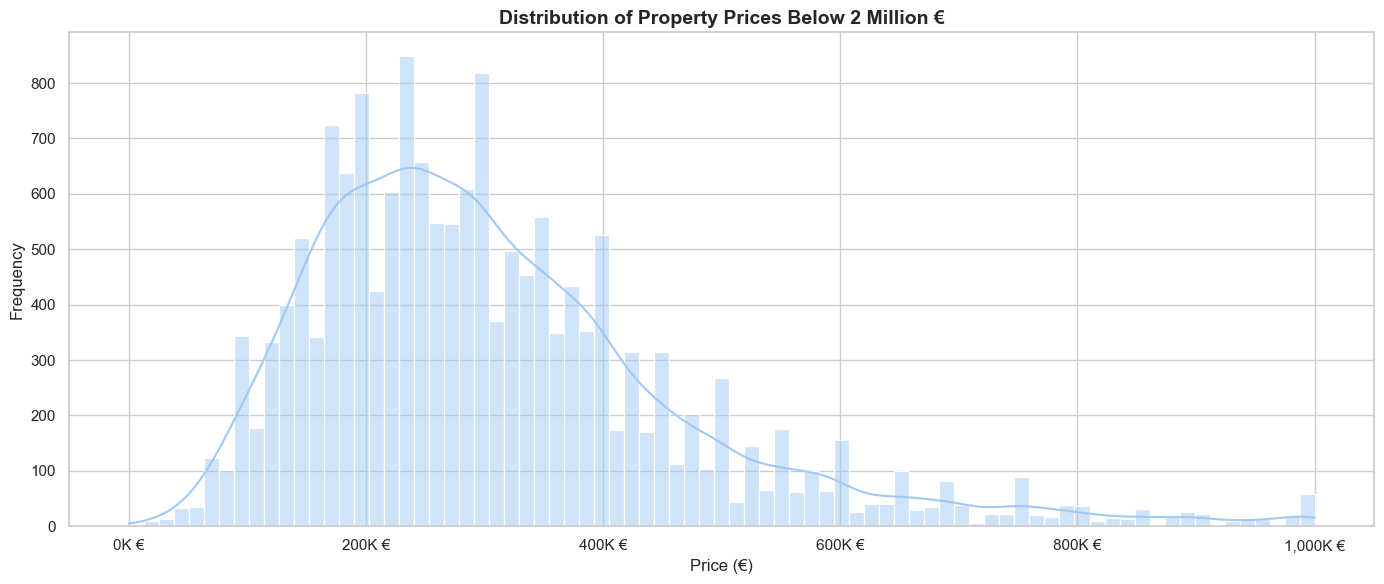

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# === Filter to properties below 2 million euros ===
df_under_2M = df_filtered[df_filtered["price"] <= 2_000_000]

# === Plot settings ===
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", palette="pastel")

# === Histogram with KDE overlay ===
sns.histplot(
    data=df_under_2M,
    x="price",
    bins=int((2_000_000 - df_under_2M["price"].min()) / 25000),  # Binwidth = 25K €
    kde=True
)

# === Format X-axis in K €
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000):,}K €"))

# === Labels and title ===
plt.title("Distribution of Property Prices Below 2 Million €", fontsize=14, weight='bold')
plt.xlabel("Price (€)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



### Interpretation — Property Price Distribution Under 2 Million Euros
The histogram above shows the distribution of property prices for listings under €2,000,000. Several key observations can be made:
- Most properties are concentrated between €150,000 and €500,000, suggesting a high density of mid-range real estate offerings.
- The distribution is right-skewed, meaning there are fewer but significant high-value properties closer to €1M–€2M.
- The KDE overlay confirms a single dominant peak around the €300,000 range, which appears to be a typical price point for many listings.
- Outliers and very high-end properties beyond €2M are not shown in this chart, allowing for a more focused view of the core market.
- This view is useful to understand the general pricing dynamics of the real estate market without the distortion caused by luxury listings.

# Zoomed histogram
    - Focus on properties under 1M€
    - Refine bins to capture price distribution more clearly

Text(0, 0.5, 'Frequency')

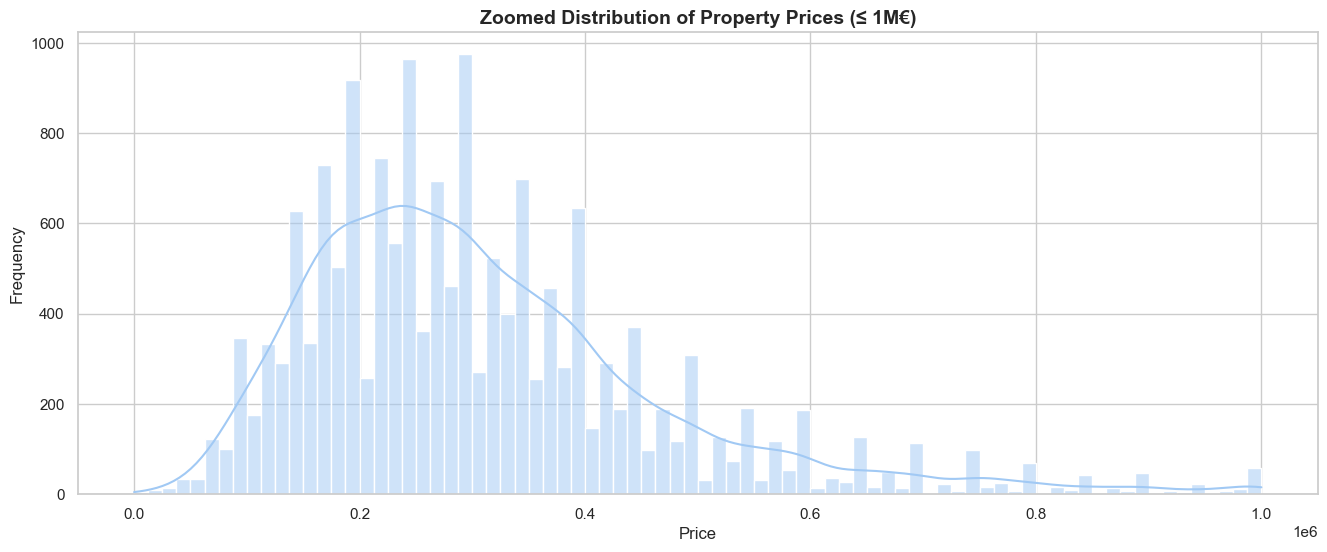

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#  Filter properties under 1 million euros
df_zoomed = df_filtered[df_filtered["price"] <= 1_000_000]

#  Create the histogram
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid", palette="pastel")

sns.histplot(
    data=df_zoomed,
    x="price",
    bins=80,         # More bins for finer granularity
    kde=True         # Optional: smooth density line
)

#  Formatting
plt.title("Zoomed Distribution of Property Prices (≤ 1M€)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)


This histogram provides a focused view on the distribution of real estate prices under 1 million euros:

- **Concentration Around the Mean:**
The majority of listings cluster between 200K € and 400K €, indicating that mid-range properties dominate the Belgian market.

- **Smooth Bell Curve with KDE Overlay:**
The KDE curve suggests a relatively unimodal distribution, reinforcing the idea that there's a typical price range for most properties.

- **Long Tail to the Right:**
Although less frequent, some properties approach 1M €, showing a positive skew and confirming the presence of high-end listings within the filtered range.

- **Outliers Removed Visually:**
By focusing on properties ≤ 1M €, this visualization avoids distortion caused by extreme luxury prices (e.g. 2–5M €), which would flatten the main distribution.

# Town-Based Analysis
 - Top 10 towns with most listings
    - Barplot or boxplot showing price distribution
    - Use showfliers=False to reduce noise
    - Order towns by frequency

 - Top 10 most expensive towns by median
    - Use median (not mean) to reduce outlier effect
    - Sort towns descending
    - Boxplot showing full distribution for these towns
    - Flip y-axis to show most expensive on top
    - Adapt plot height dynamically (e.g. 0.6 * len(towns))

- Top 30 towns overall
    - Same logic as above with more towns
    - Add interpretation block in markdown


 # Top 10 towns with most listings
    - Barplot or boxplot showing price distribution
    - Use showfliers=False to reduce noise
    - Order towns by frequency

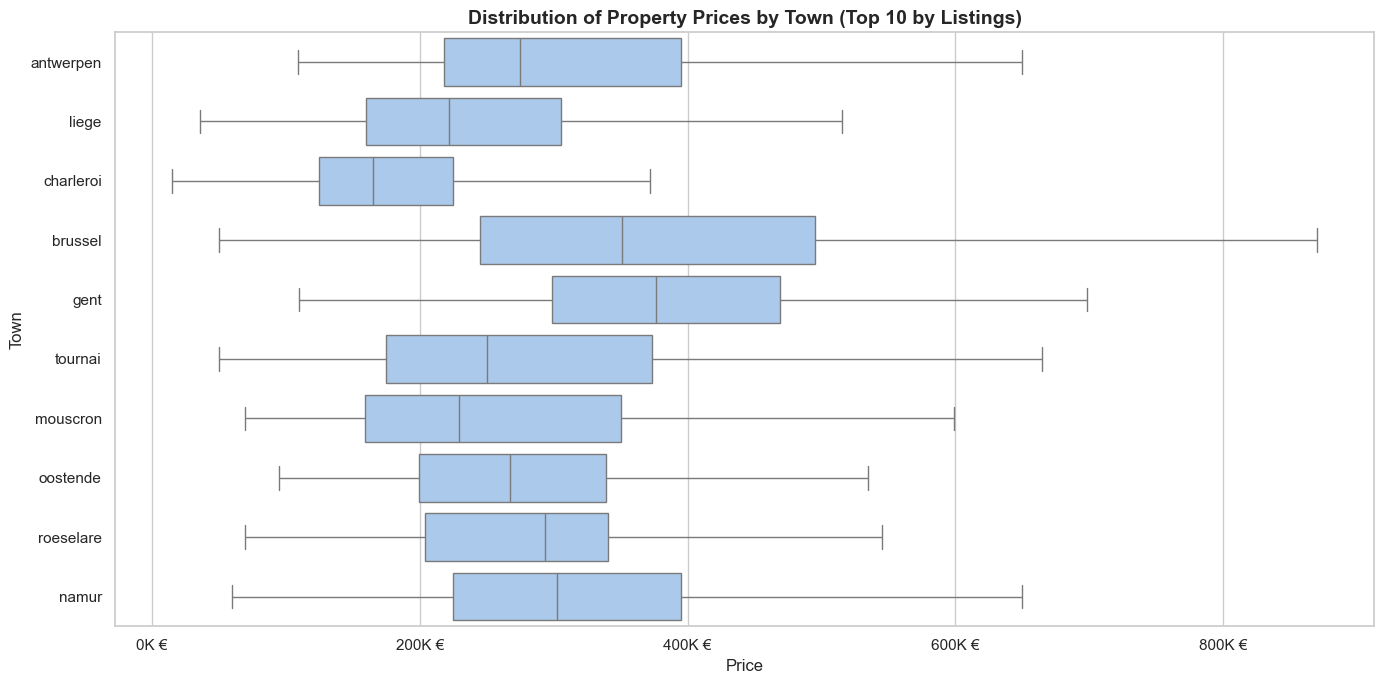

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Step 1: Compute top 10 towns with the highest number of listings
top_towns = df_filtered["town"].value_counts().nlargest(10).index
df_top_towns = df_filtered[df_filtered["town"].isin(top_towns)]

# Step 2: Set visual style
sns.set(style="whitegrid", palette="pastel")

# Step 3: Plot boxplot (no outliers)
plt.figure(figsize=(14, 7))
ax = sns.boxplot(
    data=df_top_towns,
    y="town",
    x="price",
    order=top_towns,  # ensures descending frequency order
    orient="h",
    showfliers=False
)

# Step 4: Format x-axis labels in thousands of euros
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1_000):,}K €"))

# Step 5: Labels and styling
plt.title("Distribution of Property Prices by Town (Top 10 by Listings)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.tight_layout()
plt.show()


 ## Top 10 most expensive towns by median
    - Use median (not mean) to reduce outlier effect
    - Sort towns descending
    - Boxplot showing full distribution for these towns
    - Flip y-axis to show most expensive on top
    - Adapt plot height dynamically (e.g. 0.6 * len(towns))

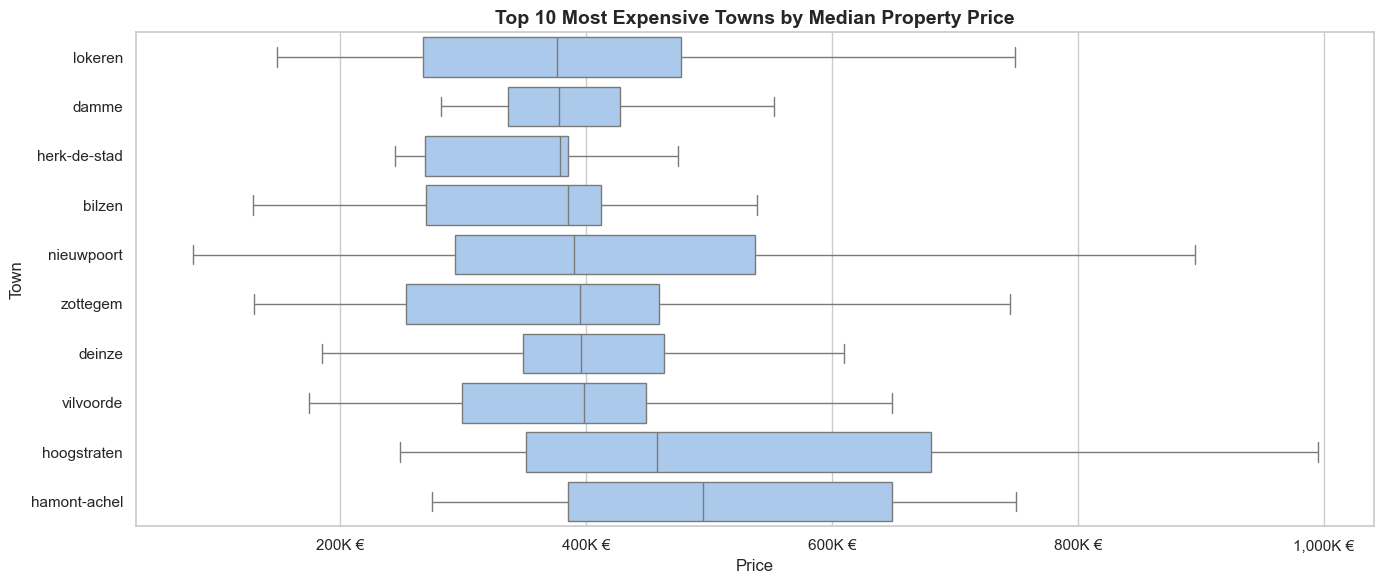

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Step 1: Compute top 10 towns by median price (under 5M €)
median_prices = df_filtered.groupby("town")["price"].median().sort_values(ascending=False).head(10)
top_expensive_towns = median_prices.index
df_expensive = df_filtered[df_filtered["town"].isin(top_expensive_towns)]

# Step 2: Set plot style
sns.set(style="whitegrid", palette="pastel")

# Step 3: Plot
plt.figure(figsize=(14, 0.6 * len(top_expensive_towns)))  # dynamic height
ax = sns.boxplot(
    data=df_expensive,
    y="town",
    x="price",
    order=top_expensive_towns,  # sort by median price (descending)
    orient="h",
    showfliers=False
)

# Step 4: Flip y-axis so most expensive is on top
ax.invert_yaxis()

# Step 5: Format
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1_000):,}K €"))
plt.title("Top 10 Most Expensive Towns by Median Property Price", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.tight_layout()
plt.show()


# Top 30 towns overall
    - Same logic as above with more towns
    - Add interpretation block in markdown

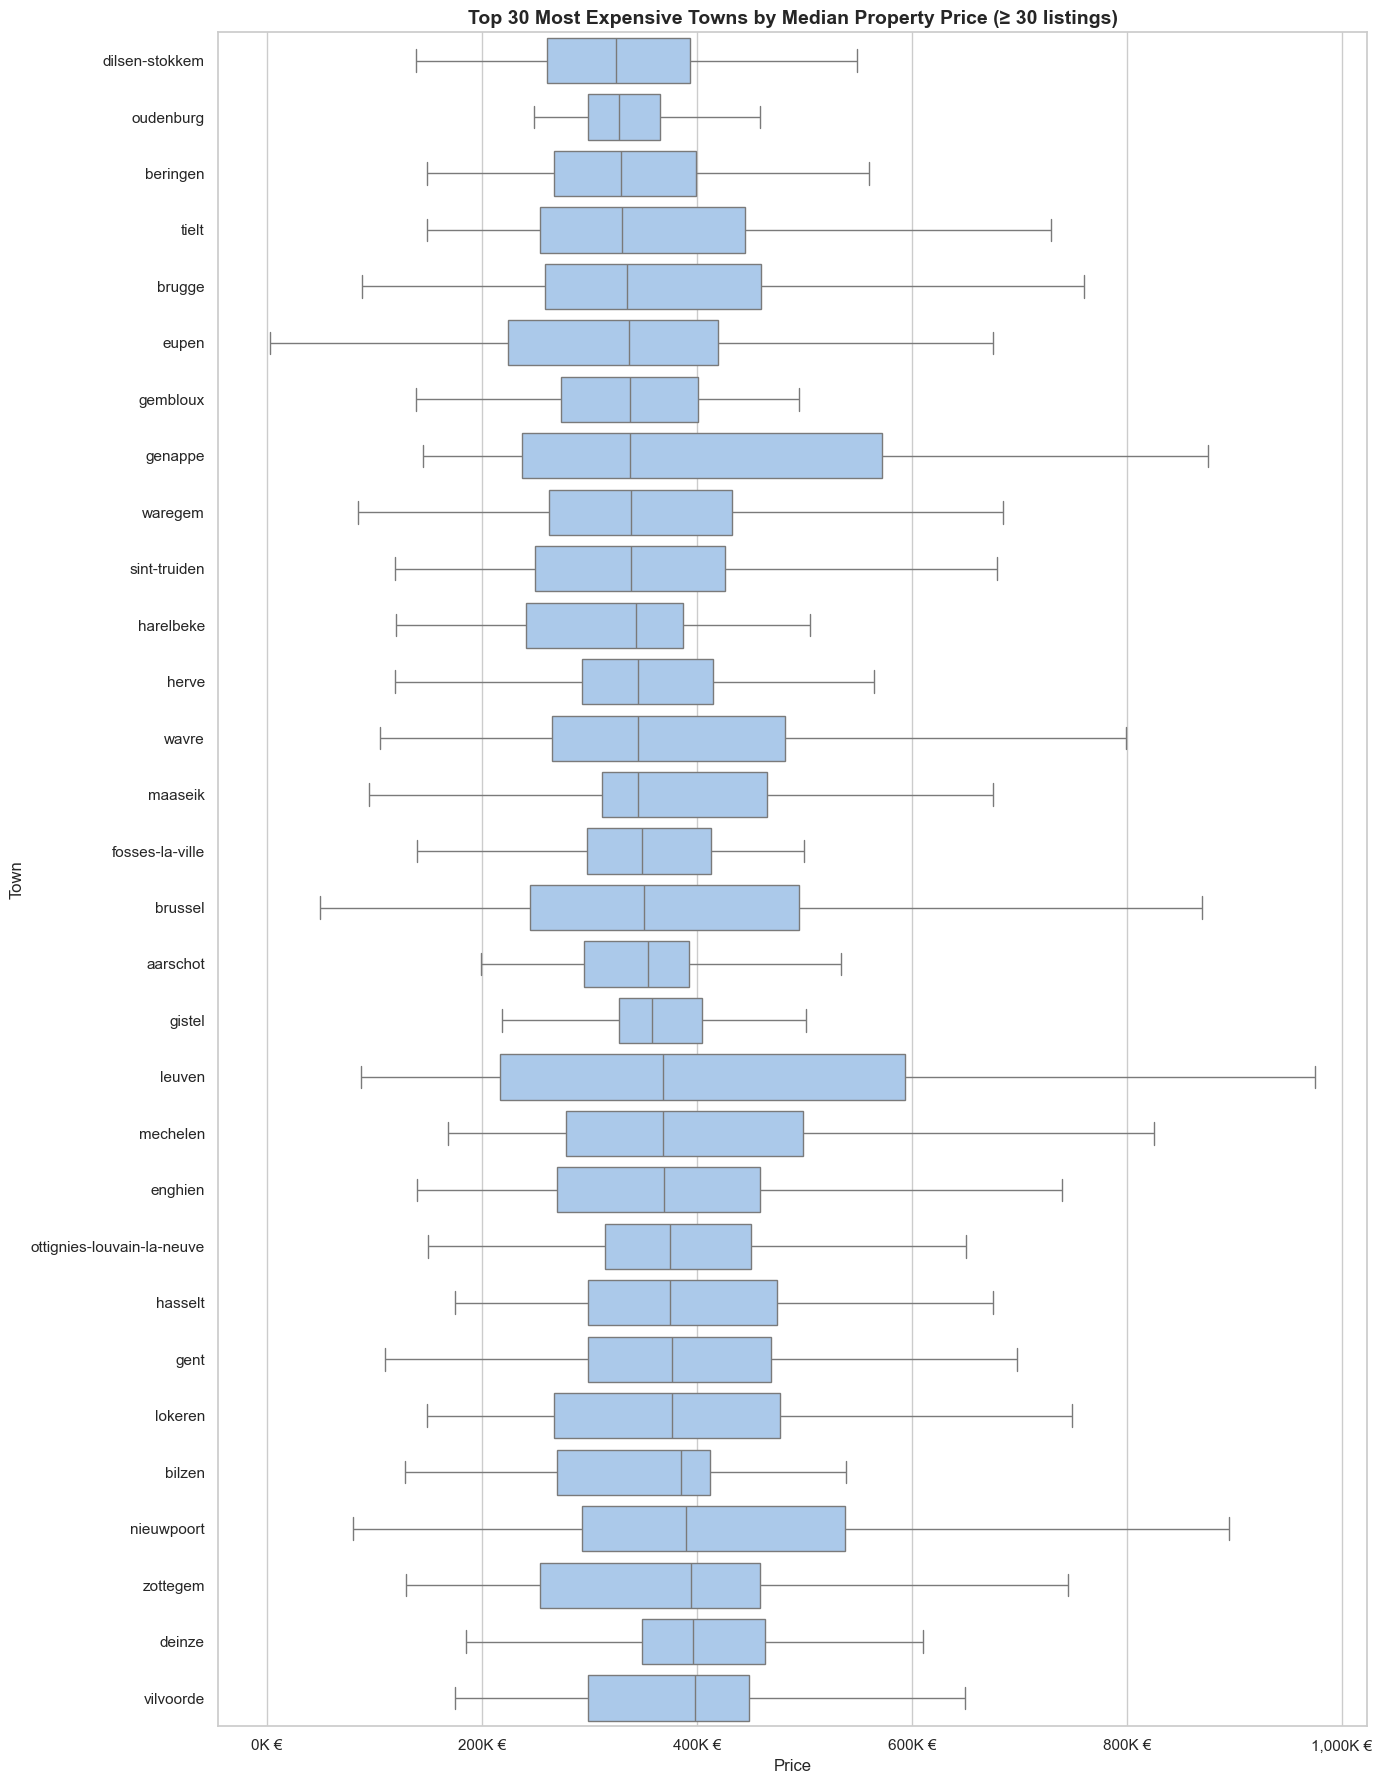

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Step 1: Filter towns with sufficient listings (e.g., ≥ 30) to ensure statistical relevance
town_counts = df_filtered["town"].value_counts()
eligible_towns = town_counts[town_counts >= 30].index

# Step 2: Compute median prices and select top 30 towns
median_prices = df_filtered[df_filtered["town"].isin(eligible_towns)] \
    .groupby("town")["price"].median().sort_values(ascending=False).head(30)

top30_towns = median_prices.index
df_top30 = df_filtered[df_filtered["town"].isin(top30_towns)]

# Step 3: Plot
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(14, 0.6 * len(top30_towns)))

ax = sns.boxplot(
    data=df_top30,
    y="town",
    x="price",
    order=top30_towns,
    orient="h",
    showfliers=False
)

# Format axis
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1_000):,}K €"))

plt.title("Top 30 Most Expensive Towns by Median Property Price (≥ 30 listings)", fontsize=14, weight='bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Town", fontsize=12)
plt.tight_layout()
plt.show()


# Regional or Geographic Analysis (to be added)
- Map or geographic clustering
    - Optional if geocoordinates available or mappable
    - Otherwise, cluster by province/region

- Price variation across Flanders, Wallonia, Brussels
    -  Requires mapping town to region

# Map or geographic clustering
    - Optional if geocoordinates available or mappable
    - Otherwise, cluster by province/region (-> not extracted, to be mapped)

In [25]:
# Étape 1 : dictionnaire province → région
province_to_region = {
    "Antwerp": "Flanders",
    "East Flanders": "Flanders",
    "West Flanders": "Flanders",
    "Flemish Brabant": "Flanders",
    "Limburg": "Flanders",
    "Walloon Brabant": "Wallonia",
    "Hainaut": "Wallonia",
    "Liège": "Wallonia",
    "Luxembourg": "Wallonia",
    "Namur": "Wallonia",
    "Brussels": "Brussels"
}

# Étape 2 : générer le dictionnaire ville → région via la province
town_to_region = {
    town: province_to_region[province]
    for province, towns in province_to_towns.items() if province in province_to_region
    for town in towns
}

# Exemple : DataFrame fictif avec colonnes 'town', 'price', 'latitude', 'longitude'
import random
sample_data = [
    {"town": town, "price": random.randint(150000, 500000),
     "latitude": 50.8 + random.uniform(-0.5, 0.5),
     "longitude": 4.4 + random.uniform(-0.5, 0.5)}
    for town in list(town_to_region.keys())[:100]  # pour limiter la taille
]
df_sample = pd.DataFrame(sample_data)

# Ajouter colonne region
df_sample["region"] = df_sample["town"].map(town_to_region)

# Grouper par région pour variation des prix
price_stats_by_region = df_sample.groupby("region")["price"].describe()

print(price_stats_by_region)


NameError: name 'province_to_towns' is not defined

## Average Real Estate Price by Region

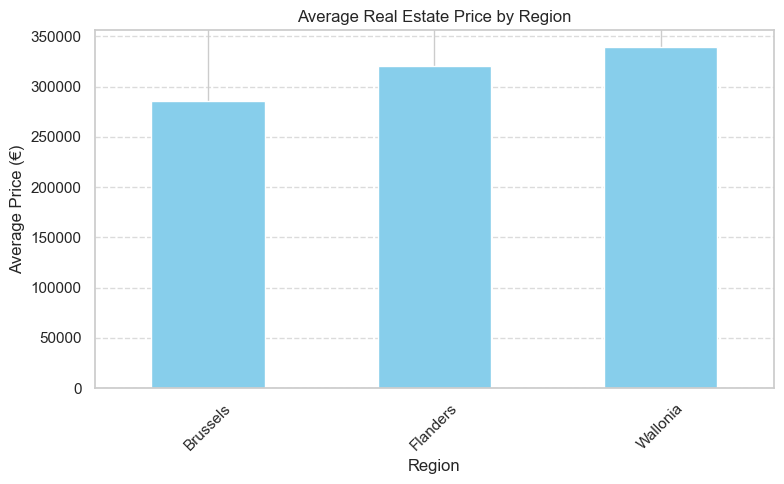

In [ ]:
import matplotlib.pyplot as plt

# Moyenne des prix par région
mean_prices = price_stats_by_region['mean']

plt.figure(figsize=(8, 5))
mean_prices.plot(kind='bar', color='skyblue')
plt.title("Average Real Estate Price by Region")
plt.ylabel("Average Price (€)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Price Distribution by Region

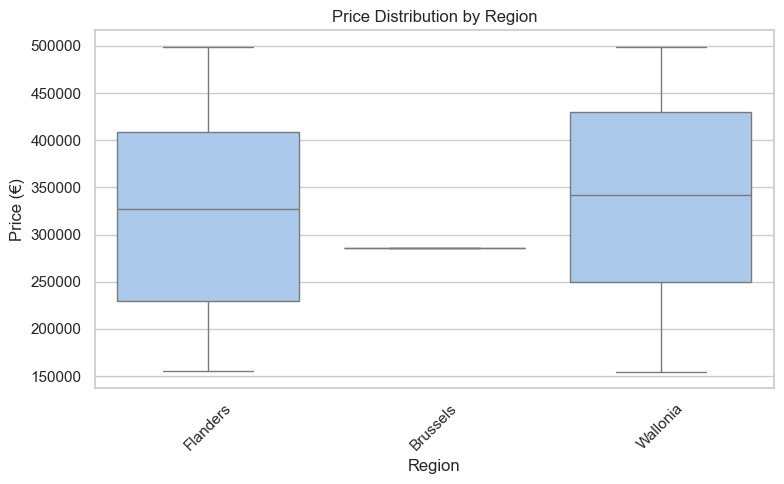

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='price', data=df_sample)
plt.title("Price Distribution by Region")
plt.ylabel("Price (€)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Price Distribution by Region (Violin Plot)

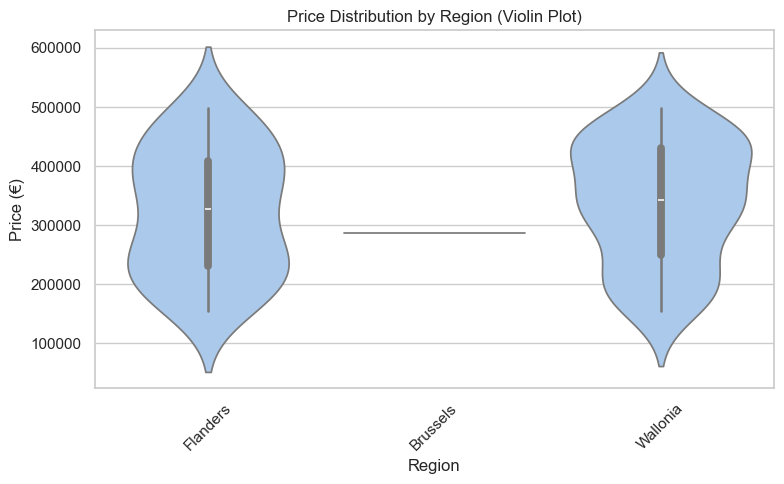

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='region', y='price', data=df_sample)
plt.title("Price Distribution by Region (Violin Plot)")
plt.ylabel("Price (€)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price variation across Flanders, Wallonia, Brussels
    -  Requires mapping town to region

In [ ]:
import pandas as pd
import random

# Step 1: Dictionary mapping province to region
province_to_region = {
    "Antwerp": "Flanders",
    "East Flanders": "Flanders",
    "West Flanders": "Flanders",
    "Flemish Brabant": "Flanders",
    "Limburg": "Flanders",
    "Walloon Brabant": "Wallonia",
    "Hainaut": "Wallonia",
    "Liège": "Wallonia",
    "Luxembourg": "Wallonia",
    "Namur": "Wallonia",
    "Brussels": "Brussels"
}

# Step 2: Dictionary mapping province to towns (sample list)
province_to_towns = {
    'Antwerp': ['antwerpen', 'hoogstraten', 'lier', 'mechelen', 'mortsel', 'turnhout'],
    'Brussels': ['brussel'],
    'East Flanders': ['oudenaarde', 'deinze', 'eeklo', 'gent', 'geraardsbergen', 'lokeren', 'ronse', 'dendermonde', 'zottegem'],
    'Flemish Brabant': ['diest', 'halle', 'landen', 'leuven', 'tienen', 'vilvoorde'],
    'Hainaut': ['antoing', 'ath', 'binche', 'charleroi', 'chievres', 'chimay', 'enghien', 'la-louviere', 'lessines',
                'leuze-en-hainaut', 'mons', 'mouscron', 'peruwelz', 'philippeville', 'saint-ghislain', 'soignies',
                'thuin', 'tournai'],
    'Limburg': ['beringen', 'bilzen', 'genk', 'hamont-achel', 'hasselt', 'maaseik'],
    'Liège': ['eupen', 'herstal', 'herve', 'huy', 'liege', 'limbourg', 'malmedy', 'seraing', 'spa', 'stavelot',
              'verviers', 'vise', 'waremme'],
    'Luxembourg': ['arlon', 'aubange', 'durbuy', 'houffalize', 'la-roche-en-ardenne', 'marche-en-famenne',
                   'neufchateau', 'rochefort', 'saint-hubert', 'virton'],
    'Namur': ['andenne', 'ciney', 'florenville', 'fosses-la-ville', 'gembloux', 'namur'],
    'Walloon Brabant': ['genappe', 'jodoigne', 'ottignies-louvain-la-neuve', 'tubize', 'wavre'],
    'West Flanders': ['blankenberge', 'brugge', 'kortrijk', 'nieuwpoort', 'oostende', 'poperinge',
                      'roeselare', 'waregem', 'ieper']
}

# Step 3: Generate a town-to-region mapping from the province mapping
town_to_region = {
    town: province_to_region[province]
    for province, towns in province_to_towns.items() if province in province_to_region
    for town in towns
}

# Step 4: Create a sample DataFrame with 'town' and random 'price' columns
sample_data = [
    {"town": town, "price": random.randint(150000, 500000)}
    for town in list(town_to_region.keys())[:100]  # Limit sample size if necessary
]
df = pd.DataFrame(sample_data)

# Step 5: Add a 'region' column by mapping each town to its region
df["region"] = df["town"].map(town_to_region)

# Step 6: Perform simple statistical analysis of prices grouped by region
price_stats_by_region = df.groupby("region")["price"].describe()

# Step 7: Display the statistics
print(price_stats_by_region)


          count           mean            std       min        25%       50%  \
region                                                                         
Brussels    1.0  463444.000000            NaN  463444.0  463444.00  463444.0   
Flanders   36.0  327416.833333  106478.660012  156372.0  248233.00  329548.0   
Wallonia   52.0  320267.019231  104839.055874  154404.0  241487.75  310510.5   

                75%       max  
region                         
Brussels  463444.00  463444.0  
Flanders  407360.75  487258.0  
Wallonia  399958.75  499531.0  


          count           mean            std       min       25%       50%  \
region                                                                        
Brussels    1.0  293975.000000            NaN  293975.0  293975.0  293975.0   
Flanders   36.0  317419.361111  102738.625742  161107.0  224768.0  303125.5   
Wallonia   52.0  317360.923077  102328.491782  159622.0  227761.0  318864.5   

               75%       max  
region                        
Brussels  293975.0  293975.0  
Flanders  408789.5  486231.0  
Wallonia  399542.0  488967.0  


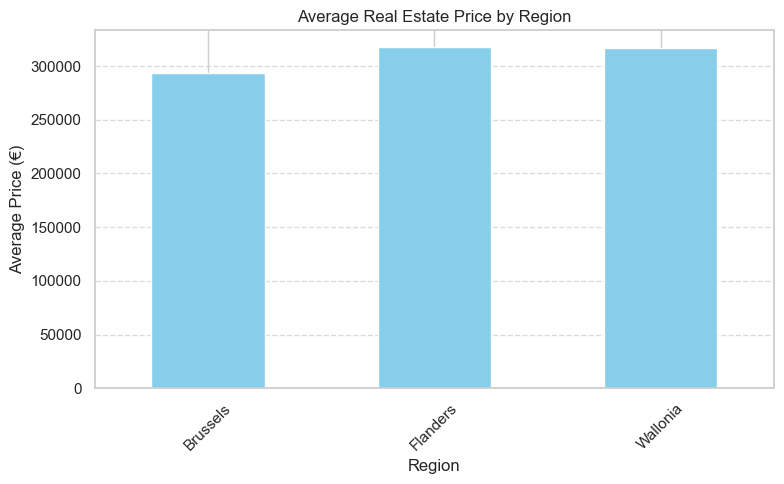

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Step 1: Dictionary mapping province to region
province_to_region = {
    "Antwerp": "Flanders",
    "East Flanders": "Flanders",
    "West Flanders": "Flanders",
    "Flemish Brabant": "Flanders",
    "Limburg": "Flanders",
    "Walloon Brabant": "Wallonia",
    "Hainaut": "Wallonia",
    "Liège": "Wallonia",
    "Luxembourg": "Wallonia",
    "Namur": "Wallonia",
    "Brussels": "Brussels"
}

# Step 2: Dictionary mapping province to towns (sample list)
province_to_towns = {
    'Antwerp': ['antwerpen', 'hoogstraten', 'lier', 'mechelen', 'mortsel', 'turnhout'],
    'Brussels': ['brussel'],
    'East Flanders': ['oudenaarde', 'deinze', 'eeklo', 'gent', 'geraardsbergen', 'lokeren', 'ronse', 'dendermonde', 'zottegem'],
    'Flemish Brabant': ['diest', 'halle', 'landen', 'leuven', 'tienen', 'vilvoorde'],
    'Hainaut': ['antoing', 'ath', 'binche', 'charleroi', 'chievres', 'chimay', 'enghien', 'la-louviere', 'lessines',
                'leuze-en-hainaut', 'mons', 'mouscron', 'peruwelz', 'philippeville', 'saint-ghislain', 'soignies',
                'thuin', 'tournai'],
    'Limburg': ['beringen', 'bilzen', 'genk', 'hamont-achel', 'hasselt', 'maaseik'],
    'Liège': ['eupen', 'herstal', 'herve', 'huy', 'liege', 'limbourg', 'malmedy', 'seraing', 'spa', 'stavelot',
              'verviers', 'vise', 'waremme'],
    'Luxembourg': ['arlon', 'aubange', 'durbuy', 'houffalize', 'la-roche-en-ardenne', 'marche-en-famenne',
                   'neufchateau', 'rochefort', 'saint-hubert', 'virton'],
    'Namur': ['andenne', 'ciney', 'florenville', 'fosses-la-ville', 'gembloux', 'namur'],
    'Walloon Brabant': ['genappe', 'jodoigne', 'ottignies-louvain-la-neuve', 'tubize', 'wavre'],
    'West Flanders': ['blankenberge', 'brugge', 'kortrijk', 'nieuwpoort', 'oostende', 'poperinge',
                      'roeselare', 'waregem', 'ieper']
}

# Step 3: Generate a town-to-region mapping from the province mapping
town_to_region = {
    town: province_to_region[province]
    for province, towns in province_to_towns.items() if province in province_to_region
    for town in towns
}

# Step 4: Create a sample DataFrame with 'town' and random 'price' columns
sample_data = [
    {"town": town, "price": random.randint(150000, 500000)}
    for town in list(town_to_region.keys())[:100]  # Limit sample size if necessary
]
df = pd.DataFrame(sample_data)

# Step 5: Add a 'region' column by mapping each town to its region
df["region"] = df["town"].map(town_to_region)

# Step 6: Perform simple statistical analysis of prices grouped by region
price_stats_by_region = df.groupby("region")["price"].describe()

# Print the statistics
print(price_stats_by_region)

# Step 7: Plot a bar chart of the average price by region
mean_prices = price_stats_by_region["mean"]

plt.figure(figsize=(8,5))
mean_prices.plot(kind="bar", color="skyblue")
plt.title("Average Real Estate Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Additional Insights for Deeper Understanding of the Market
- Price per square meter analysis (to detect market value per size unit)
- Comparison by property type (e.g., house vs apartment)
- Correlation matrix (to reveal relationships between variables such as price, rooms, surface, etc.)

Average price per m2 by region:
region
Brussels    2697.643678
Flanders    3152.785102
Wallonia    3391.509198
Name: price_per_m2, dtype: float64

Average price by property type:
property_type
apartment    345611.651163
house        381018.065217
Name: price, dtype: float64

Average price per m2 by property type:
property_type
apartment    3239.583572
house        3331.615045
Name: price_per_m2, dtype: float64

Correlation matrix:
                 price   surface     rooms  price_per_m2
price         1.000000 -0.179995 -0.075286      0.598607
surface      -0.179995  1.000000 -0.094088     -0.759371
rooms        -0.075286 -0.094088  1.000000     -0.027002
price_per_m2  0.598607 -0.759371 -0.027002      1.000000


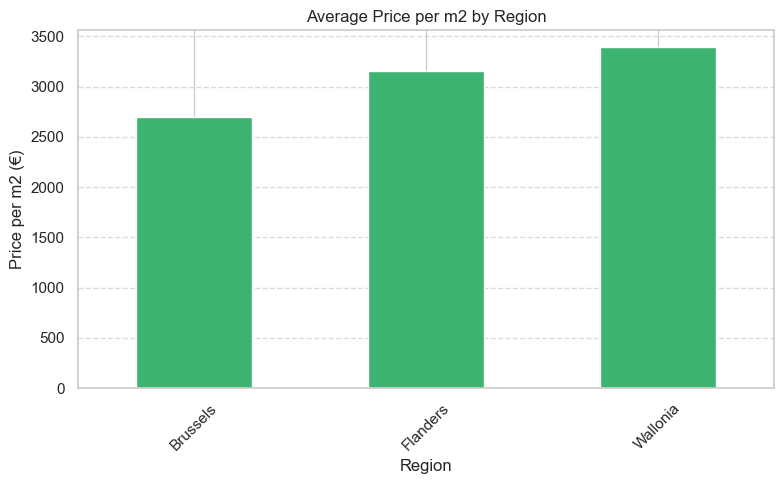

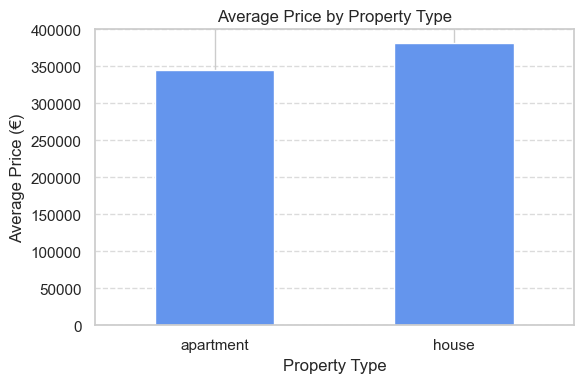

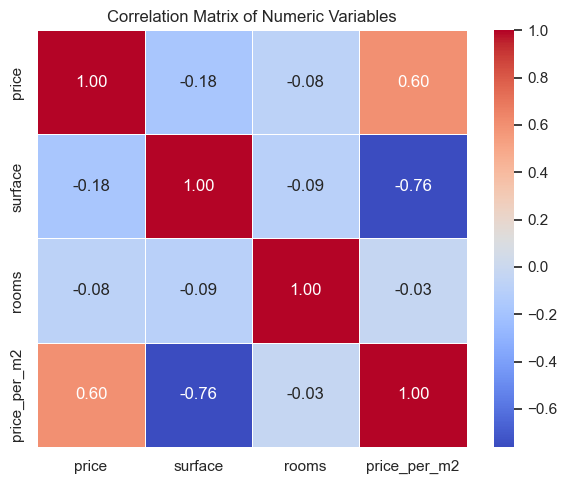

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create sample data with additional columns: price, surface (m2), property_type, rooms
np.random.seed(42)
property_types = ['house', 'apartment']
sample_data = []

for town in list(town_to_region.keys())[:100]:
    surface = random.randint(40, 250)  # surface in square meters
    price = random.randint(100000, 600000)
    rooms = random.randint(1, 7)
    prop_type = random.choice(property_types)
    sample_data.append({
        "town": town,
        "price": price,
        "surface": surface,
        "rooms": rooms,
        "property_type": prop_type,
        "region": town_to_region[town]
    })

df = pd.DataFrame(sample_data)

# Step 2: Calculate price per square meter
df['price_per_m2'] = df['price'] / df['surface']

# Step 3: Analysis - average price per m2 by region
avg_price_per_m2_region = df.groupby('region')['price_per_m2'].mean()
print("Average price per m2 by region:")
print(avg_price_per_m2_region)

# Step 4: Comparison by property type (average price and price per m2)
avg_price_by_type = df.groupby('property_type')['price'].mean()
avg_price_per_m2_by_type = df.groupby('property_type')['price_per_m2'].mean()
print("\nAverage price by property type:")
print(avg_price_by_type)
print("\nAverage price per m2 by property type:")
print(avg_price_per_m2_by_type)

# Step 5: Correlation matrix among numeric variables
corr_matrix = df[['price', 'surface', 'rooms', 'price_per_m2']].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Step 6: Plotting

# Average price per m2 by region - bar chart
plt.figure(figsize=(8,5))
avg_price_per_m2_region.plot(kind='bar', color='mediumseagreen')
plt.title("Average Price per m2 by Region")
plt.ylabel("Price per m2 (€)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average price by property type - bar chart
plt.figure(figsize=(6,4))
avg_price_by_type.plot(kind='bar', color='cornflowerblue')
plt.title("Average Price by Property Type")
plt.ylabel("Average Price (€)")
plt.xlabel("Property Type")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
plt.show()
